## Exercício

Utilize o dataset de Insurance com as categorias criadas abaixo, faça o treinamento do K vizinhos para as classes escolhidas usando os Scalers que acabamos de conhecer e compare a performance

### Passo a passo

1 - Escolha um Scaler e faça o instanciamento

2 - Faça o fit transform dos dados de treino e o transform dos dados de teste

3 - Faça o fit com os dados escalados, e o target não escalado

4 - Gere a predição com os dados de teste escalados

5 - Analise as metricas usando matriz de confusão e classification report

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Regressão - target insurance['charges']
# Fazer encoding das features categóricas

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
coded_insurance = pd.get_dummies(insurance,
                                 drop_first=True,
                                 columns=['sex', 'smoker'],
                                 dtype=int)

coded_insurance['region_encoded'] = coded_insurance['region'].map({'southeast':1,
                                                                   'southwest':2,
                                                                   'northwest':3,
                                                                   'northeast':4})

coded_insurance.drop('region', axis=1, inplace=True)
coded_insurance.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_encoded
0,19,27.900,0,16884.92400,0,1,2
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,3
4,32,28.880,0,3866.85520,1,0,3
5,31,25.740,0,3756.62160,0,0,1
6,46,33.440,1,8240.58960,0,0,1
7,37,27.740,3,7281.50560,0,0,3
8,37,29.830,2,6406.41070,1,0,4
9,60,25.840,0,28923.13692,0,0,3


In [22]:
coded_insurance.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_encoded
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,2.455157
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.130197
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,1.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,3.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,4.000000


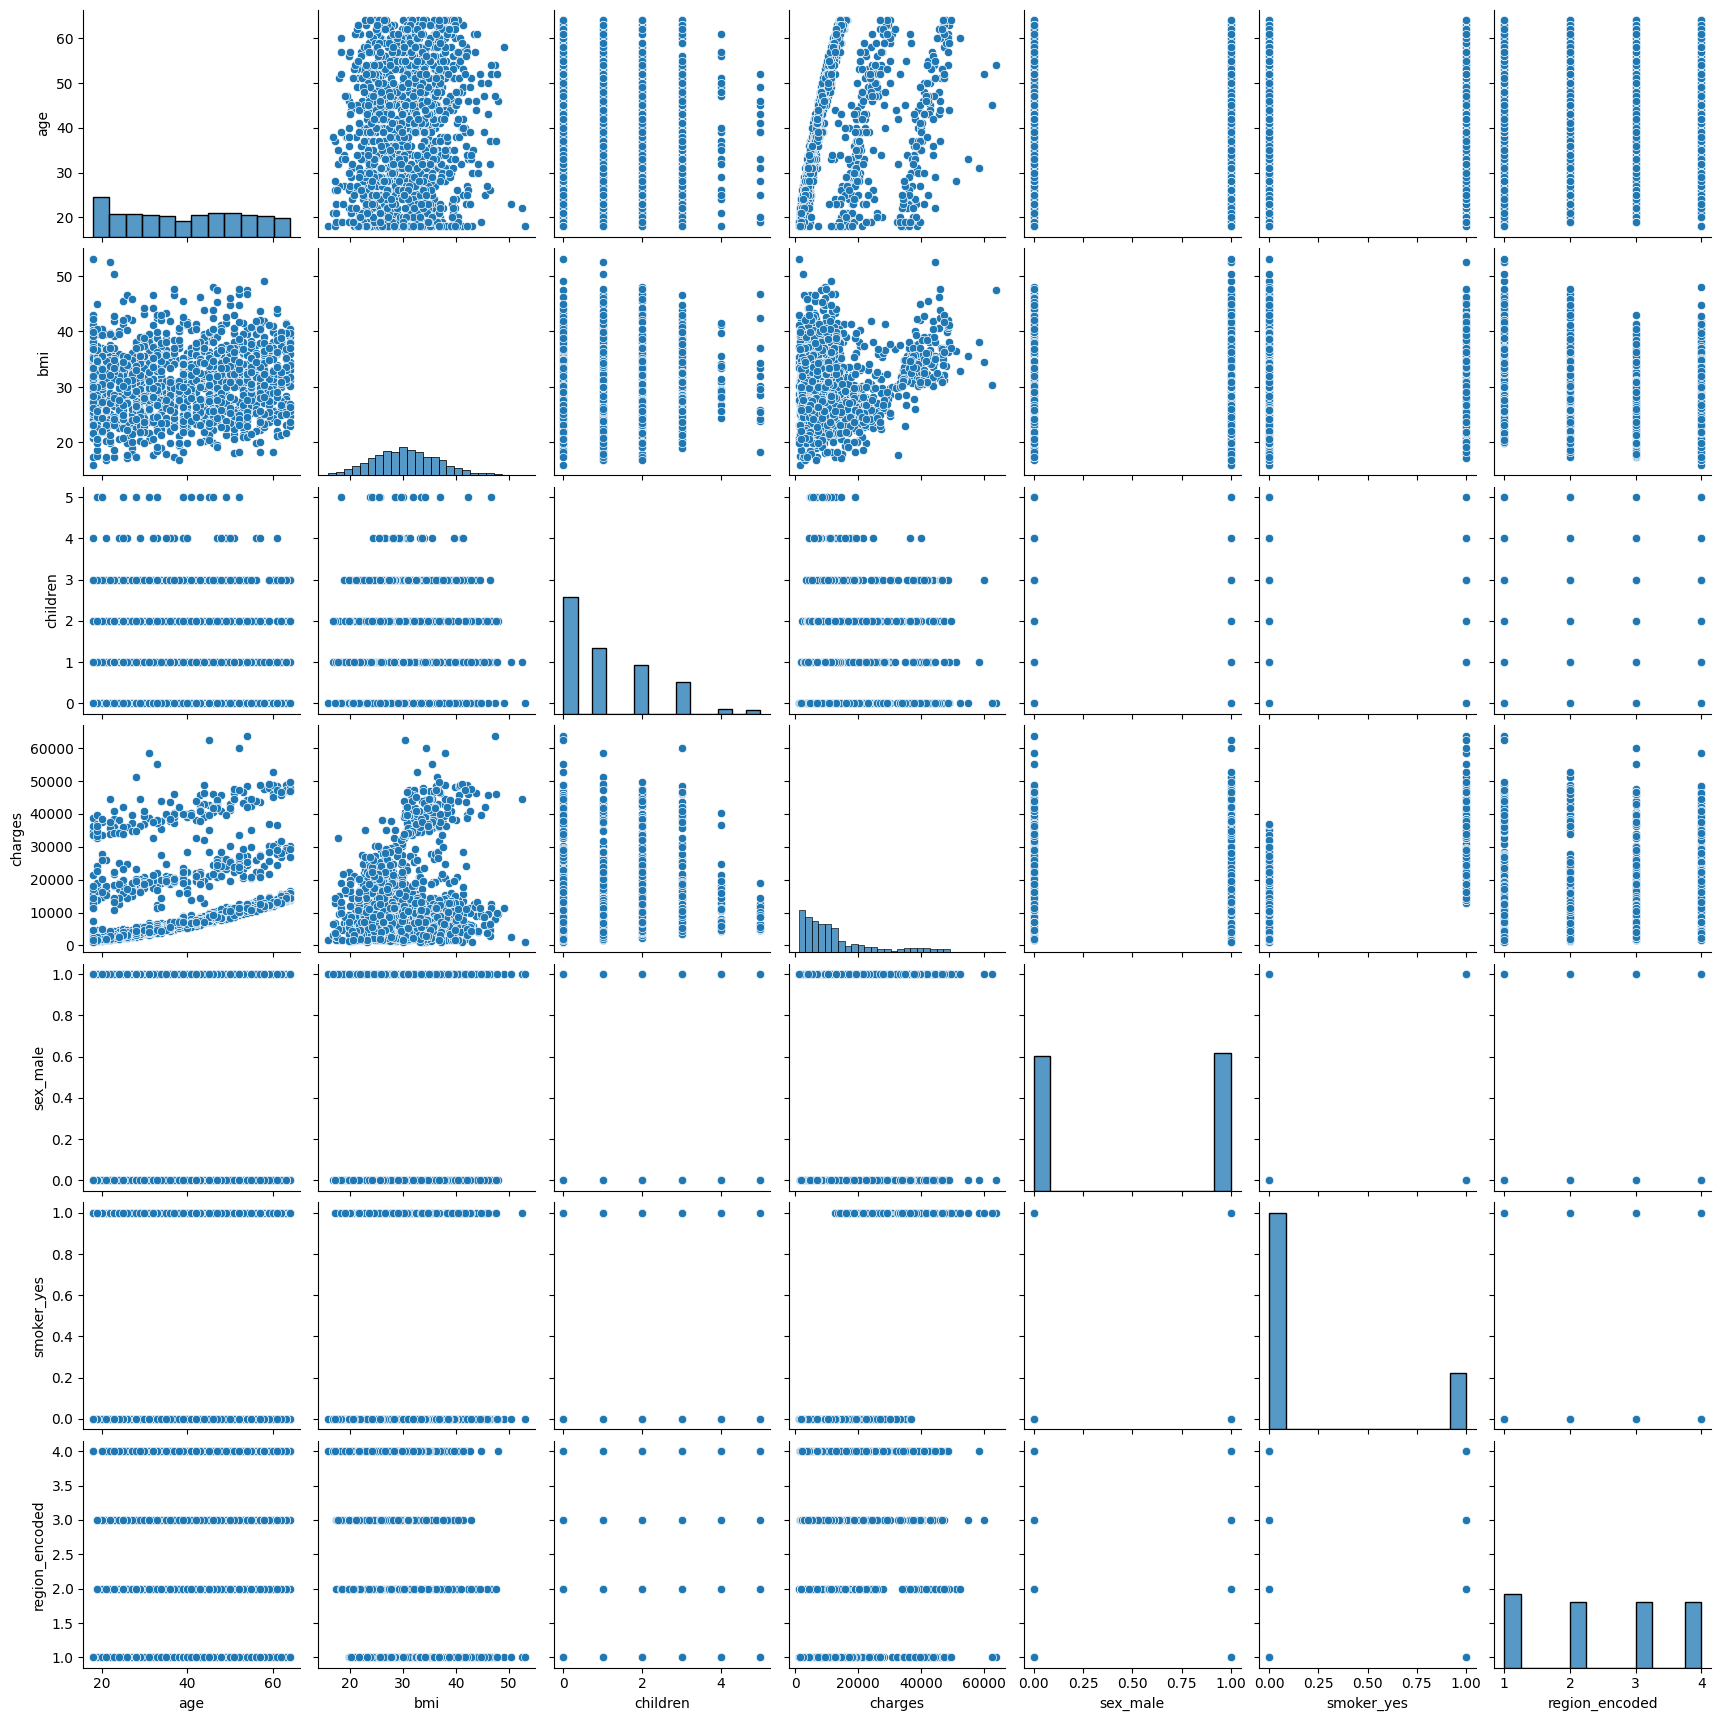

In [23]:
sns.pairplot(data=coded_insurance)

<Axes: >

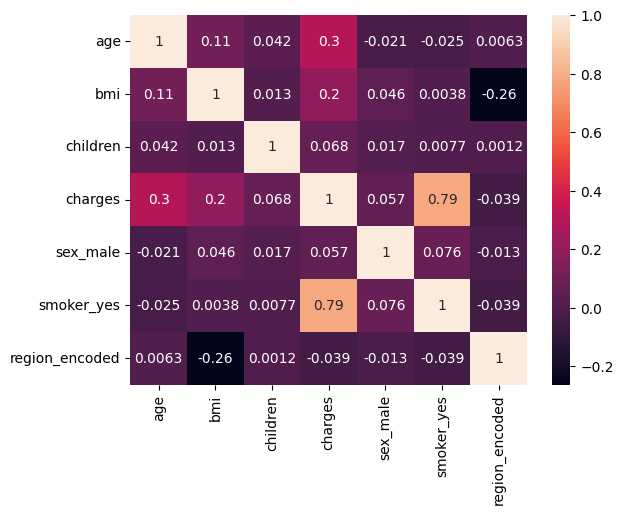

In [25]:
sns.heatmap(coded_insurance.corr(), annot=True)

In [26]:
X = coded_insurance.drop('charges', axis=1)
y = coded_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
rs = RobustScaler().fit(X_train)
X_train_rs = rs.transform(X_train)
X_test_rs = rs.transform(X_test)

In [32]:
pd.DataFrame(X_train_rs)

,0,1,2,3,4,5
0,0.270833,-1.237449,0.5,-1.0,0.0,0.5
1,0.312500,-0.710387,-0.5,-1.0,0.0,1.0
2,0.520833,-0.645259,-0.5,-1.0,0.0,-0.5
3,-0.020833,0.495703,2.0,-1.0,0.0,-0.5
4,0.604167,-1.054123,1.0,-1.0,0.0,0.5
...,...,...,...,...,...,...
1065,-0.895833,0.137494,1.5,-1.0,0.0,1.0
1066,-0.020833,-0.764662,2.0,-1.0,0.0,-0.5
1067,0.770833,-0.607267,-0.5,0.0,0.0,1.0
1068,-0.104167,2.097392,0.5,-1.0,1.0,0.0


In [39]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train_rs, y_train)

KNeighborsRegressor()

In [40]:
y_pred_rs = knn.predict(X_test_rs)

print(f'r2: {r2_score(y_test, y_pred_rs)}, mse: {mean_squared_error(y_test, y_pred_rs)}')

r2: 0.8273059551176007, mse: 26810531.40417588
